In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("netflix_titles.csv")

In [3]:
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [6]:
print(df['type'].value_counts())

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [7]:
print(df['country'].value_counts().head(10))

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


In [9]:
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')

df['year_added'] = df['date_added'].dt.year

print(df['year_added'].value_counts().sort_index())

year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      11
2014.0      24
2015.0      82
2016.0     429
2017.0    1188
2018.0    1649
2019.0    2016
2020.0    1879
2021.0    1498
Name: count, dtype: int64


In [10]:
print(df['rating'].value_counts())

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


In [11]:
from collections import Counter

genres = df['listed_in'].dropna().apply(lambda x: x.split(', '))
flat_genres = [genre for sublist in genres for genre in sublist]

top_genres = Counter(flat_genres).most_common(10)
print(top_genres)

[('International Movies', 2752), ('Dramas', 2427), ('Comedies', 1674), ('International TV Shows', 1351), ('Documentaries', 869), ('Action & Adventure', 859), ('TV Dramas', 763), ('Independent Movies', 756), ('Children & Family Movies', 641), ('Romantic Movies', 616)]


In [13]:
import matplotlib.pyplot as plt

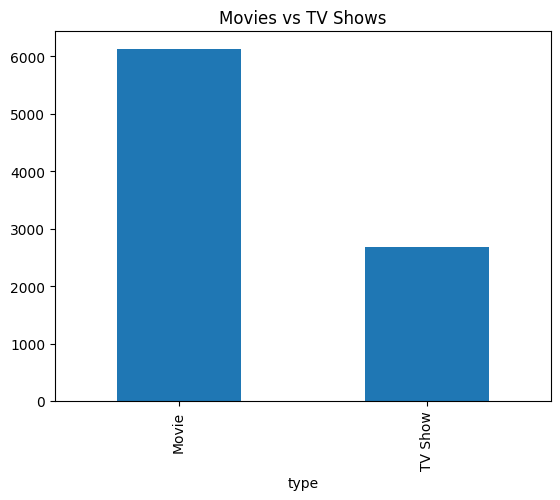

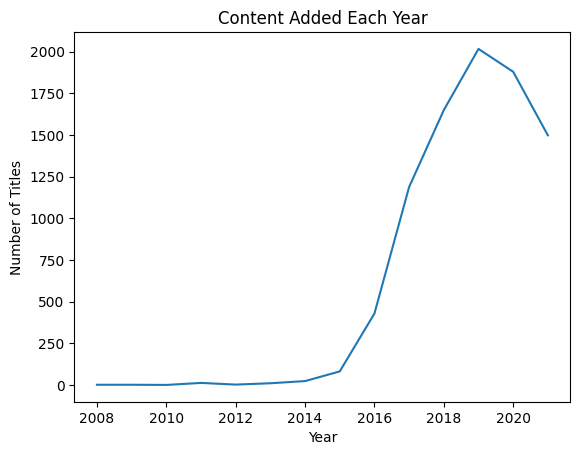

In [14]:
df['type'].value_counts().plot(kind='bar', title='Movies vs TV Shows')
plt.show()

df['year_added'].value_counts().sort_index().plot(kind='line', title='Content Added Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

<Axes: title={'center': 'Movies vs TV Shows by Year'}, xlabel='year_added'>

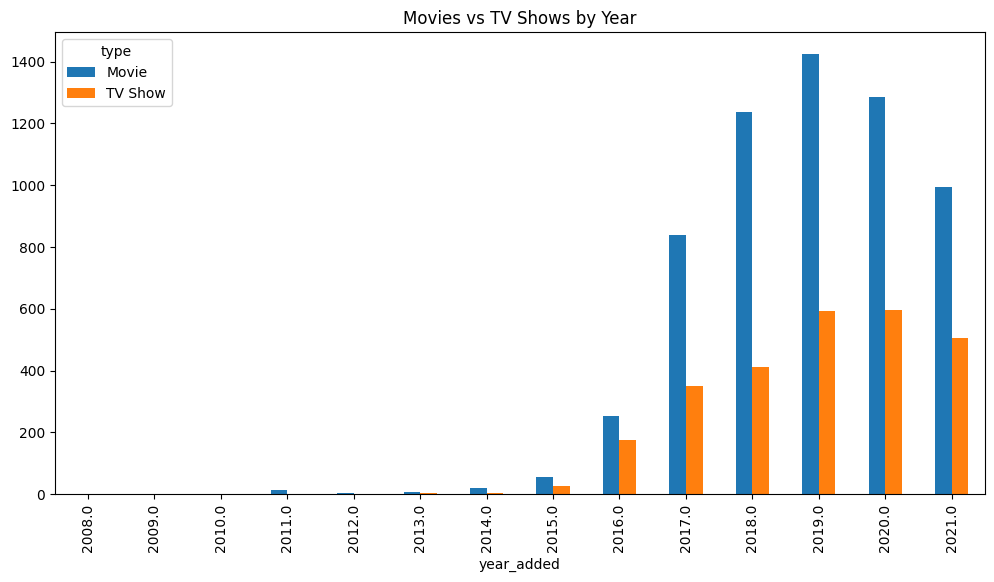

In [15]:
content_per_year_type = df.groupby(['year_added', 'type']).size().unstack().fillna(0)
content_per_year_type.plot(kind='bar', stacked=False, figsize=(12,6), title='Movies vs TV Shows by Year')

In [16]:
df['country'] = df['country'].fillna('Unknown')
country_type = df.groupby(['country', 'type']).size().unstack().fillna(0).sort_values(by='Movie', ascending=False)
print(country_type.head(10))

type             Movie  TV Show
country                        
United States   2058.0    760.0
India            893.0     79.0
Unknown          440.0    391.0
United Kingdom   206.0    213.0
Canada           122.0     59.0
Spain             97.0     48.0
Egypt             92.0     14.0
Nigeria           86.0      9.0
Indonesia         77.0      2.0
Turkey            76.0     29.0


<Axes: title={'center': 'Content Added by Month'}, xlabel='month_added'>

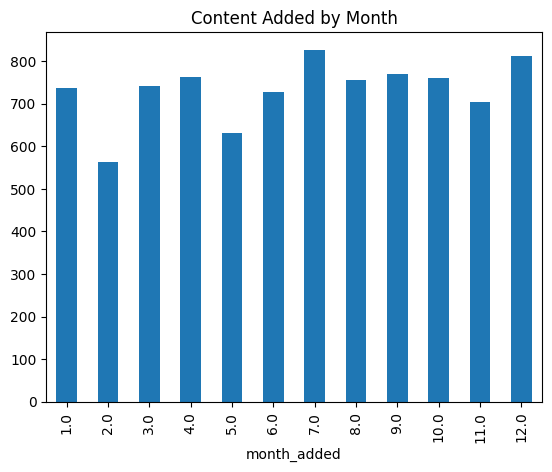

In [17]:
df['month_added'] = df['date_added'].dt.month
df['month_added'].value_counts().sort_index().plot(kind='bar', title='Content Added by Month')

In [18]:
from collections import Counter

cast = df['cast'].dropna().apply(lambda x: x.split(', '))
flat_cast = [person.strip() for sublist in cast for person in sublist]
common_cast = Counter(flat_cast).most_common(10)
print(common_cast)

[('Anupam Kher', 43), ('Shah Rukh Khan', 35), ('Julie Tejwani', 33), ('Naseeruddin Shah', 32), ('Takahiro Sakurai', 32), ('Rupa Bhimani', 31), ('Akshay Kumar', 30), ('Om Puri', 30), ('Yuki Kaji', 29), ('Amitabh Bachchan', 28)]


In [19]:
df[df['type'] == 'Movie']['duration'].value_counts().head(10)
df[df['type'] == 'TV Show']['duration'].value_counts().head(10)

duration
1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
Name: count, dtype: int64

In [20]:
duplicate_titles = df[df.duplicated('title', keep=False)].sort_values('title')
print(duplicate_titles[['title', 'release_year', 'country']])

Empty DataFrame
Columns: [title, release_year, country]
Index: []
